<center><h1>Last_First_HW7</h1></center>

Name: Yu-Hsuan Lu
<br>
Github Username: @YuHsuan-Lu
<br>
USC ID: 6849388612

In [ ]:
# please rerun all cells again to get full results

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [7]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.svm import SVC,LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,silhouette_score,make_scorer, hamming_loss
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [8]:
df = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [9]:
X = df.drop(['Family','Genus','Species'],axis=1)
y = df['Family']
f_X_train, f_X_test, f_y_train, f_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X = df.drop(['Family','Genus','Species'],axis=1)
y = df['Genus']
g_X_train, g_X_test, g_y_train, g_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X = df.drop(['Family','Genus','Species'],axis=1)
y = df['Species']
s_X_train, s_X_test, s_y_train, s_y_test = train_test_split(X, y, test_size=0.3, random_state=42)
s_X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,37


### (b) Train a classifier for each label

#### (i) Research

Exact Match Ratio:
Count the number of instances where all predicted labels match the true labels.
Divide this by the total number of instances.

Hamming Loss:
For each instance, count the number of labels that are misclassified.
Sum this across all instances and divide by the total number of labels.

#### (ii) Train a SVM for each of the labels

In [6]:
def SVC_10_fold(X_train, y_train,X_test,y_test):
    kernel = ['rbf']
    c = list([1e-5, 1e-4, 1e-3, 1e-2, 0.1, 1, 10, 1e2, 1e3, 1e4,1e5])
    gammas = list([0.1, 1, 10, 100])

    clf = SVC()
    clf.fit(X_train, y_train)
    param_grid = dict(kernel=kernel, C=c, gamma=gammas)
    grid = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1, scoring='accuracy')
    grid.fit(f_X_train, f_y_train)
    return grid.best_params_

In [7]:
best_gamma = SVC_10_fold(f_X_train, f_y_train, f_X_test, f_y_test)
best_gamma

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [8]:
def SVC_best(X_train, y_train,X_test,y_test):
    model = SVC(kernel='rbf',gamma=best_gamma['gamma'], C=best_gamma['C'], tol=1e-5, verbose=1,max_iter=2500).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    exact_match_ratio = accuracy_score(y_test, y_pred)
    print(f"Exact Match Ratio: {exact_match_ratio}")
    hamming_loss_value = hamming_loss(y_test, y_pred)
    print(f"Hamming Loss: {hamming_loss_value}")

In [9]:
SVC_best(f_X_train, f_y_train, f_X_test, f_y_test)

[LibSVM]*
optimization finished, #iter = 55
obj = -1.611886, rho = 0.083307
nSV = 14, nBSV = 0
*
optimization finished, #iter = 183
obj = -9.952453, rho = 0.918021
nSV = 51, nBSV = 13
*
optimization finished, #iter = 166
obj = -2.575059, rho = 0.679641
nSV = 39, nBSV = 0
*
optimization finished, #iter = 250
obj = -2.894206, rho = 0.645959
nSV = 55, nBSV = 0
*
optimization finished, #iter = 132
obj = -11.026041, rho = 0.842806
nSV = 46, nBSV = 16
*
optimization finished, #iter = 294
obj = -24.615940, rho = -0.074349
nSV = 86, nBSV = 31
Total nSV = 177
Exact Match Ratio: 0.999536822603057
Hamming Loss: 0.0004631773969430292


In [10]:
def SVM_10_fold(model, X_train, y_train,X_test,y_test):
    svm_model = []
    param_grid = []
    if(model=='bii'):
        svm_model = SVC(kernel='rbf')
        param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
    elif(model=='biii'or model=='biv'):
        svm_model = LinearSVC(penalty = 'l1', dual = False, max_iter = 10000)
        param_grid = {'C' : np.logspace(1, 5, 10)}
    grid_search = GridSearchCV(svm_model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    print("Best Parameters:", best_params)
    y_pred = best_model.predict(X_test)
    exact_match_ratio = accuracy_score(y_test, y_pred)
    print(f"Exact Match Ratio: {exact_match_ratio}")
    hamming_loss_value = hamming_loss(y_test, y_pred)
    print(f"Hamming Loss: {hamming_loss_value}")

In [11]:
SVM_10_fold('bii',f_X_train, f_y_train,f_X_test,f_y_test)
SVM_10_fold('bii',g_X_train, g_y_train,g_X_test,g_y_test)
SVM_10_fold('bii',s_X_train, s_y_train,s_X_test,s_y_test)

Best Parameters: {'C': 1, 'gamma': 0.1}
Exact Match Ratio: 0.999536822603057
Hamming Loss: 0.0004631773969430292


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [12]:
SVM_10_fold('biii',f_X_train, f_y_train,f_X_test,f_y_test)
SVM_10_fold('biii',g_X_train, g_y_train,g_X_test,g_y_test)
SVM_10_fold('biii',s_X_train, s_y_train,s_X_test,s_y_test)

Best Parameters: {'C': 4641.588833612777}
Exact Match Ratio: 0.9587772116720704
Hamming Loss: 0.041222788327929596


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [13]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [14]:
def smote_data(X_train,y_train):
    print(f'Before Oversampling Training Data has {X_train.shape[0]} rows')
    y_train.value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.show()
    smote = SMOTE(sampling_strategy='all')
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    print(f'Before Oversampling Training Data has {X_train_smote.shape[0]} rows')
    y_train_smote.value_counts().plot(kind='pie', autopct='%.2f%%')
    plt.show()
    return X_train_smote, y_train_smote

Before Oversampling Training Data has 5036 rows


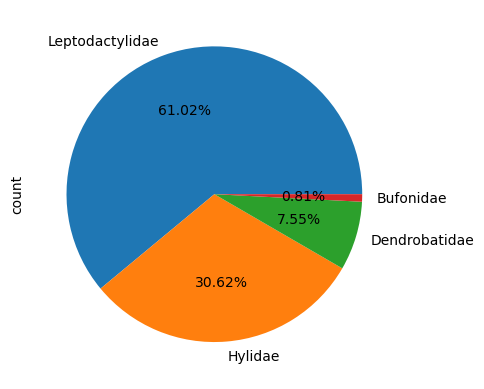

Before Oversampling Training Data has 12292 rows


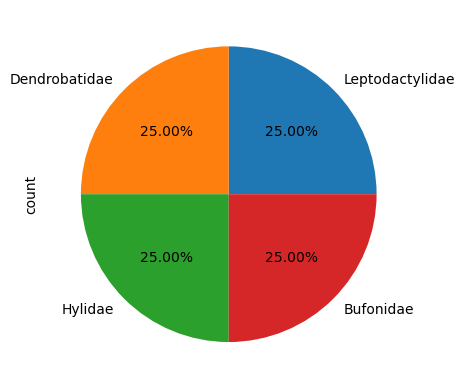

In [15]:
f_X_train,f_y_train = smote_data(f_X_train,f_y_train)
g_X_train,g_y_train = smote_data(g_X_train,g_y_train)
s_X_train,s_y_train = smote_data(s_X_train,s_y_train)

In [ ]:
SVM_10_fold('biv',f_X_train, f_y_train,f_X_test,f_y_test)
SVM_10_fold('biv',g_X_train, g_y_train,g_X_test,g_y_test)
SVM_10_fold('biv',s_X_train, s_y_train,s_X_test,s_y_test)

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

### (b) Determine which family is the majority

In [27]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.svm import SVC,LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score,f1_score,silhouette_score,make_scorer, hamming_loss
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [28]:
hamming_dist = [] 
hamming_loss = []
def report_hamming(major, pred_y, train_y):
    miss = 0
    for i in range(len(major)):
        idx = np.nonzero(pred_y == i)[0]
        train = train_y.iloc[idx].values
        pred = major.loc[i].values
        for j in range(len(train)):
            miss += np.sum(train[j] != pred)
    num_rows, num_cols = df.shape
    cur_dist = miss / num_rows
    cur_loss = miss / num_rows * num_cols
    hamming_dist.append(cur_dist)
    hamming_loss.append(cur_loss)
    print("")
    print(f"Hamming Distance: {round(cur_dist, 4)}, Hamming Loss: {round(cur_loss, 4)}")
    print("-----------------------------------------------")

In [29]:
def report_major_class(optimal_k, pred_y, train_y):
    #create an emtpy data frame to store the major class for each class with k=1...best_k
    major = pd.DataFrame(columns = train_y.columns)
    for i in range(optimal_k):
        idx = np.nonzero(pred_y == i)[0]
        #find the data corresponding to idx in train_y
        cluster_samples = train_y.iloc[idx, :]
        train = train_y.columns
        row = []
        for j in range(len(train)):
            #find the major class for each label
            cur = train_y.iloc[idx, :].loc[:, train[j]].value_counts().index[0]
            #append it to the row of major class of corresponding k
            row.append(cur)
        major.loc[i] = row
    print(major)
    return major

In [30]:
def silhouette_optimal_k(train_x):
    optimal_k = 2 
    max_score = 0
    for i in range(2, 51):
        model = KMeans(n_clusters = i)
        pred_y = model.fit_predict(train_x)
        silhouette_avg = silhouette_score(train_x, pred_y)
        if silhouette_avg > max_score:
            optimal_k = i
            max_score = silhouette_avg
    print("optimal K of this iteration: ", optimal_k)
    print("")
    return optimal_k

In [31]:
def monte_carlo(iters, train_x, train_y):
    for i in range(iters):
        print("Iteration: ", i+1)
        optimal_k = silhouette_optimal_k(train_x)
        model = KMeans(n_clusters = optimal_k, random_state = i)
        #Compute cluster centers and predict cluster index for each sample.
        pred_y = model.fit_predict(train_x)
        
        #Get the major class for each class with k=1...best_k
        major = report_major_class(optimal_k, pred_y, train_y)

        #compute hamming distance and hamming loss
        report_hamming(major, pred_y, train_y)

In [32]:
monte_carlo(50, df.iloc[:, :-4], df.iloc[:, -4:-1])

Iteration:  1
optimal K of this iteration:  4

            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1          Hylidae  Hypsiboas       HypsiboasCordobae
2    Dendrobatidae   Ameerega      Ameeregatrivittata
3          Hylidae  Hypsiboas    HypsiboasCinerascens

Hamming Distance: 0.6673, Hamming Loss: 17.349
-----------------------------------------------
Iteration:  2
optimal K of this iteration:  4

            Family      Genus                 Species
0          Hylidae  Hypsiboas       HypsiboasCordobae
1  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
2    Dendrobatidae   Ameerega      Ameeregatrivittata
3          Hylidae  Hypsiboas    HypsiboasCinerascens

Hamming Distance: 0.6673, Hamming Loss: 17.349
-----------------------------------------------
Iteration:  3
optimal K of this iteration:  4

            Family      Genus                 Species
0  Leptodactylidae  Adenomera  AdenomeraHylaedactylus
1  Leptodactylidae 

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [19]:
avg_h_dist = sum(hamming_dist)/len(hamming_dist)
avg_h_loss = sum(hamming_loss)/len(hamming_loss)
avg_h_score = 1 - avg_h_loss
print("Average Hamming Dist for 50 iters :", round(avg_h_dist, 3))
print("Average Hamming Loss for 50 iters :", round(avg_h_loss, 3))
print("Average Hamming Score for 50 iters:", round(avg_h_score, 3))

Average Hamming Dist for 50 iters : 0.896
Average Hamming Loss for 50 iters : 23.286
Average Hamming Score for 50 iters: -22.286


## 3. ISLR 12.6.2

Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
⎡⎢ 0.30.40.7⎤⎥ ⎢⎣0.3 0.5 0.8⎥⎦.
0.4 0.5 0.45 0.7 0.8 0.45
For instance, the dissimilarity between the first and second obser- vations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

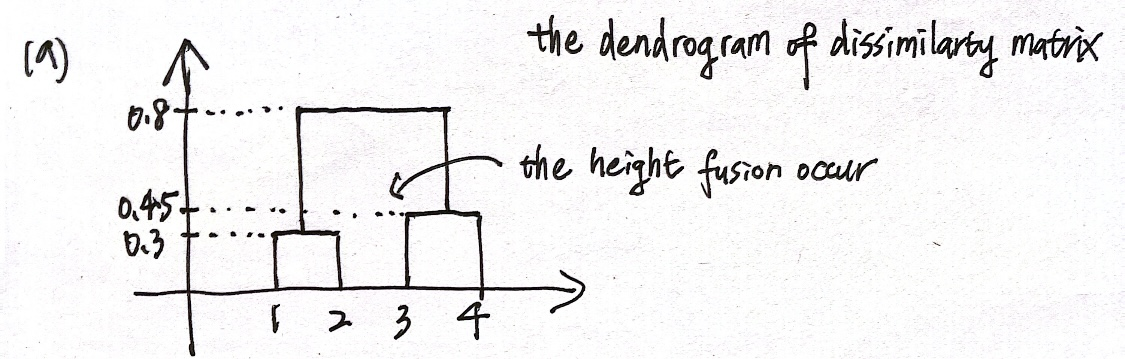

(b) Repeat (a), this time using single linkage clustering.

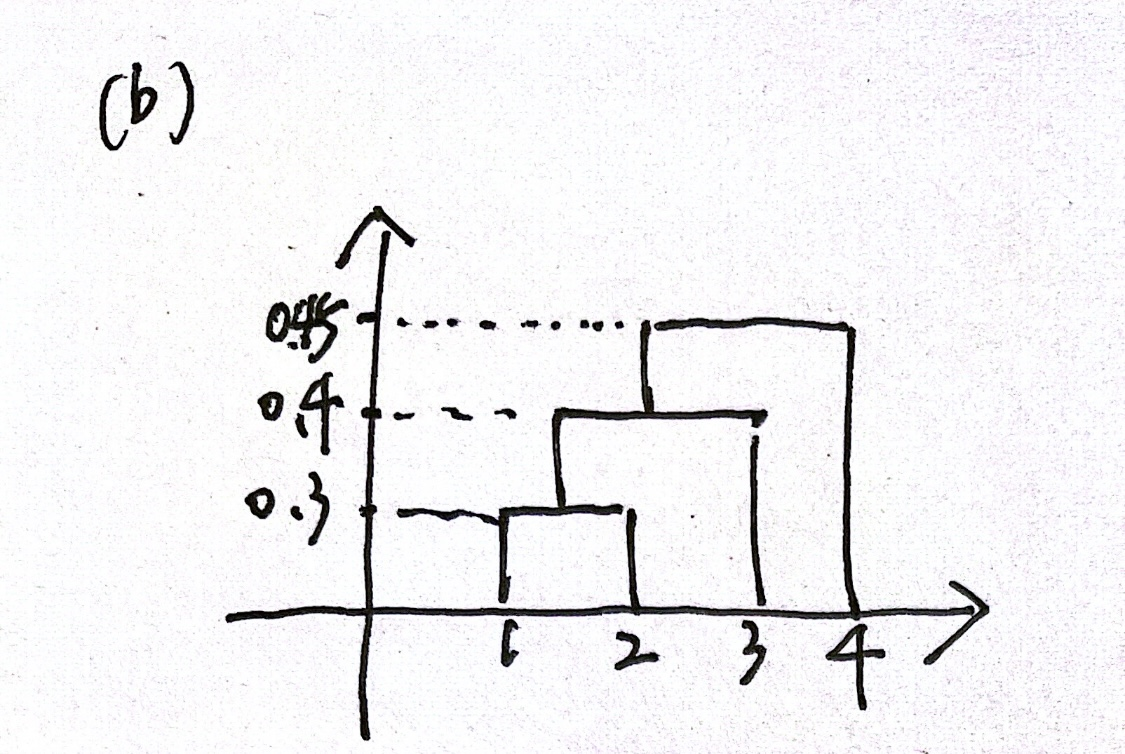

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

[1,2], [3,4]

(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

[1,2,3], [4]

(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

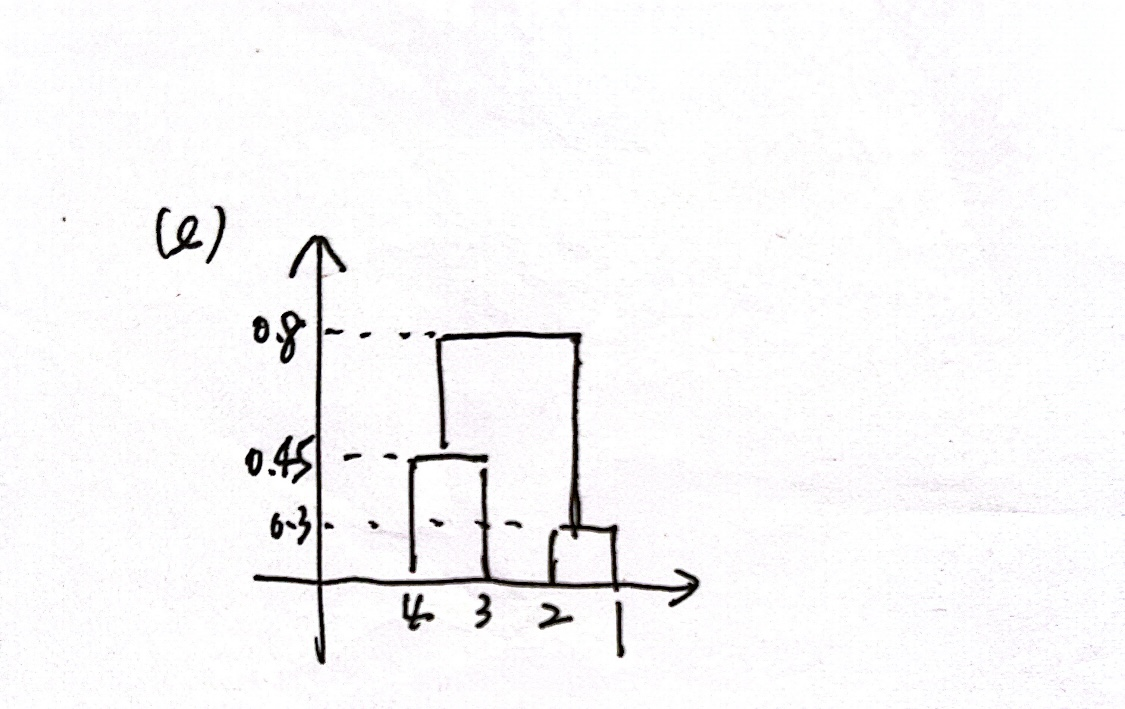